In [1]:
# Go to general directory

import os
os.chdir('..')

# Workeable libraries

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## <center>**PAPERS CLASSIFICATION METHODOLOGY**</center>

Given the similarity between the papers text, and the isic4 codes descriptions, I generated a similarity matrix between the papers and the product code using the SpaCy library. This notebook is made to define a cutoff to classify with 1 or 0 the each paper.

On future versions, we will use a cutoff based on a train file from a laboratory. Right know, the idea is to set the code that will be used on the.

Finally, there are some commented code that will be used to generate the outputs files contained in the outputs folder (pictures and tables in a .tex file)

### **THE SIMILARITY MATRIX**

The similarity matrix contains the isic4 product code in per column, and the paper code per row index. The current matrix contains 415 columns, and 8195 rows. For this documentation file, the idea is to use only a observations to set the best algorithm.

In [2]:
similarity = pd.read_csv('treatment_data/similarity.csv', index_col=0)

preview_list = [i for i in range(5)]

show_rows, show_cols = [np.random.randint(0,8000) for i in range(50)],[np.random.randint(0,400) for i in range(50)]
display(similarity.reset_index().iloc[preview_list, preview_list])

# #### to the script
with open('outputs/tables/similarity_example.tex','w') as tf:
    tf.write(similarity.iloc[show_rows, show_cols].to_latex(index=True))

,ID,A0111,A0112,A0113,A0114
0,ECOTEC0,0.538843,0.400701,0.493672,0.376184
1,ECOTEC1,0.586021,0.518464,0.586978,0.490004
2,ECOTEC2,0.537921,0.421800,0.466639,0.376050
3,ECOTEC3,0.565879,0.508339,0.545375,0.460480
4,ECOTEC4,0.609101,0.598569,0.597453,0.543756


C:\Users\00213379\AppData\Local\Temp\ipykernel_3664\701847124.py:10: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  tf.write(similarity.iloc[show_rows, show_cols].to_latex(index=True))


For the analysis, is necessary to set a cutoff that set the value to 1 if the classification i accepted, and 0 otherwise. The next is a graph that counts the papers classified by cutoff, as a portion of the hole dataframe.

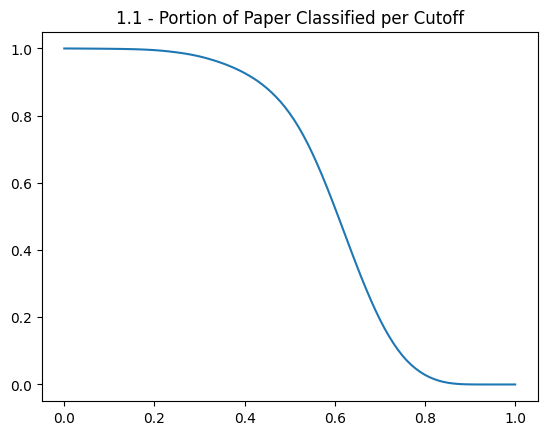

In [3]:
# This code shows the cutoff by all the 
range_base = np.arange(0, 1.01, 0.01)

# Count of observations bigger or equal to the cutoff
count_array = np.zeros(range_base.shape[0])

similarity_matrix = similarity.iloc[:,1:].to_numpy()
for i in range(range_base.shape[0]):
    count_array[i] = (np.where(similarity_matrix>=range_base[i], 1, 0)).sum()
    
# Get the possible values. Also, get free space after redefine similarity_matrix


plt.title('1.1 - Portion of Paper Classified per Cutoff')
plt.plot(range_base, (count_array / (similarity_matrix.shape[0] * similarity_matrix.shape[1])))
# #### to the script
plt.savefig('outputs/graphs/g1_portion_classified.jpg')
plt.show()

Note that the previous curve is generated by counting the amount of papers classified for every ISIC4 code. It will be important if the amount of classified papers change per ISIC4 code, but as there are too many classifications, I only focused myself on the keyword of the ISIC4. Ex: The set {A0111, A0112, A0113} ϵ A.

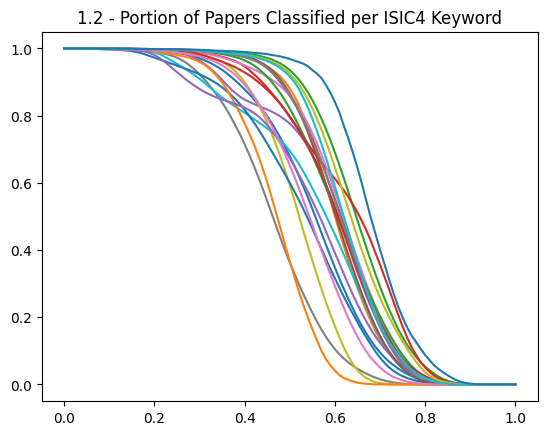

In [4]:
range_base = np.arange(0, 1.01, 0.01)

# We first generate the letter codes

codes_columns = similarity.columns[1:].to_list()

products_codes = [x[0] for x in codes_columns]

products_codes = np.unique(products_codes)

###################################################
### This commented code is to plot by ISIC4 type
##########################################

#######################################################################
for j in products_codes:

    columns_list = [i for i in codes_columns if j in i]
    col_array = similarity[columns_list].to_numpy()

    count_array = np.zeros(range_base.shape[0])

    for i in range(range_base.shape[0]):
        count_array[i] = (np.where(col_array>=range_base[i], 1, 0)).sum()

    col_array = col_array.shape[0] * col_array.shape[1]

    plt.plot(range_base, (count_array / col_array))
####################################################################

plt.title('1.2 - Portion of Papers Classified per ISIC4 Keyword')
# #### to the script
plt.savefig('outputs/graphs/g1_2_portion_classified_per_code.jpg')
plt.show()


The graph 1.2 shows that there is an important difference in the portion of papers classified per cutoff, based on the classification keyword. This make relevant to have a different cutoff depending on the code keyword.

The different cutoff will be generated with the train data made on the laboratory

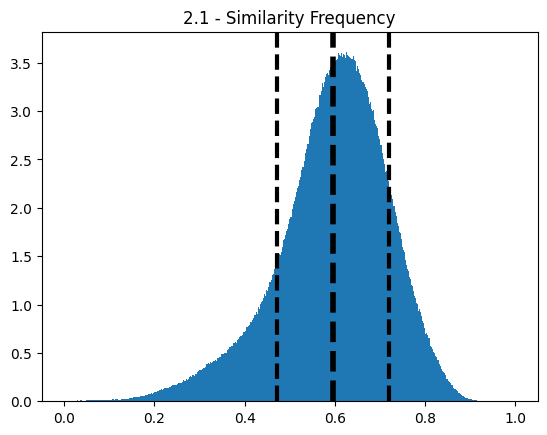

The value that shows the mean plus the standard deviation is at the cutoff:
0.7194619783594189


In [5]:
# This code is to show the distribution of the similarity values:

plt.hist(similarity_matrix.flatten(), bins = np.arange(0, 1.001, 0.001), density=True)
plt.axvline(similarity_matrix.flatten().mean(), color='k', linestyle='dashed', linewidth=4)
plt.axvline(similarity_matrix.flatten().mean()+similarity_matrix.flatten().std(), color='k', linestyle='dashed', linewidth=3)
plt.axvline(similarity_matrix.flatten().mean()-similarity_matrix.flatten().std(), color='k', linestyle='dashed', linewidth=3)
plt.title("2.1 - Similarity Frequency") 
#### to the script
plt.savefig('outputs/graphs/g1_3_similarity_frequency.jpg')
plt.show()

print('The value that shows the mean plus the standard deviation is at the cutoff:')
print(similarity_matrix.flatten().mean()+similarity_matrix.flatten().std())

### THE GENERAL CUTOFF

Seen the data showed, to select a general cutoff of 0.75 shows as a good initial point to classify the papers. The next code shows the products for what each papers is classified:

In [6]:
papers_list = [None]*len(similarity)

code_list = similarity.columns.to_numpy()

classification_list = list(
    map(
        lambda X, Y: ('-').join(
            [x for y in Y for x in X if y >= 0.75]
        ), [code_list]*len(similarity), similarity_matrix
    )
)
    
papers = pd.DataFrame({'ID':similarity.index.to_list(), 'product':classification_list})
papers

,ID,product
0,ECOTEC0,
1,ECOTEC1,
2,ECOTEC2,
3,ECOTEC3,
4,ECOTEC4,
...,...,...
15358,YACHAY243,A0111-A0112-A0113-A0114-A0115-A0116-A0119-A012...
15359,YACHAY244,A0111-A0112-A0113-A0114-A0115-A0116-A0119-A012...
15360,YACHAY245,A0111-A0112-A0113-A0114-A0115-A0116-A0119-A012...
15361,YACHAY246,A0111-A0112-A0113-A0114-A0115-A0116-A0119-A012...


Now, we import the information of the papers to append then to the hole data frame

In [7]:
complete = pd.read_csv('treatment_data/complete.csv')

with open('outputs/tables/papers_data.tex','w') as tf:
    tf.write(complete.iloc[preview_list, preview_list].to_latex(index=False))

display(complete.iloc[preview_list, :])

complete = complete.iloc[show_rows, :]

C:\Users\00213379\AppData\Local\Temp\ipykernel_3664\1694933518.py:4: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  tf.write(complete.iloc[preview_list, preview_list].to_latex(index=False))


,ID,Year,Province,City,Authors,Text
0,ECOTEC0,2018,GUAYAS,GUAYAQUIL,"Aguilar G.F.C., Peña A.B., Ortiz F.G.P., Lara ...",Revenue assurance method using risk analysis a...
1,ECOTEC1,2018,GUAYAS,GUAYAQUIL,"Espinoza Mina M.A., Gallegos Barzola D.P.",Ethical dimension in the use of computer infra...
2,ECOTEC2,2018,GUAYAS,GUAYAQUIL,"Zamora-Boza C., Arrobo-Cedeño N., Cornejo-Marc...",E-government in Ecuador: Innovation in public ...
3,ECOTEC3,2018,GUAYAS,GUAYAQUIL,"Martillo W.A., Ramírez M.O.",Model for the selection of an ERP system in th...
4,ECOTEC4,2018,GUAYAS,GUAYAQUIL,"Vascones Gavica B.C., Villena Izurieta N.P.",The construction industry: Its participation i...


In [8]:
# Now, I add the province of the paper, and the province of the paper, and the city

papers1 = papers
# Be sure taht you have the IDs columns as str
complete['ID'] = complete['ID'].astype(str)
papers1['ID'] = papers1['ID'].astype(str)

# merge on the left
papers1 = complete.merge(papers1, how='left', on='ID')

# Save as latex to the paper

display(papers1.head())

,ID,Year,Province,City,Authors,Text,product
0,UCSG87,2017,GUAYAS,GUAYAQUIL,"Kato H., Jochim R.C., Gomez E.A., Tsunekawa S....","Salivary gland transcripts of the kissing bug,...",A0111-A0112-A0113-A0114-A0115-A0116-A0119-A012...
1,ESPE390,2017,PICHINCHA,SANGOLQUÍ,"Jaramillo Recalde J.E., Sotomayor Mosquera P.R.",Diagnostic study of physical-recreational acti...,
2,UCUENCA770,2004,AZUAY,CUENCA,"Buytaert W., De Bièvre B., Wyseure G., Deckers J.",The use of the linear reservoir concept to qua...,A0111-A0112-A0113-A0114-A0115-A0116-A0119-A012...
3,ESPE861,2016,PICHINCHA,SANGOLQUÍ,"Bernal Onate P., Lara-Cueva R., Guaman Y.",Analysis and performace of Volterra adaptive f...,A0111-A0112-A0113-A0114-A0115-A0116-A0119-A012...
4,ESPE38,2018,PICHINCHA,SANGOLQUÍ,"Ramos P., Vargas V., Baylac M., Zergainoh N.-E...",SEE Error-Rate Evaluation of an Application Im...,A0111-A0112-A0113-A0114-A0115-A0116-A0119-A012...


The next step takes a between one or two hours. The idea is to first, get the data of the other papers that are not the same, but contains st least one common author.

In [9]:
papers2 = papers1.copy()

papers2.pop('Text')

papers2_matrix = papers2.to_numpy()


publication_matrix = np.array([np.concatenate((x, y)) for x in papers2_matrix for y in papers2_matrix])



# Now, we need to know how connected are the publications with the others. That can be made with the authors and references columns
# The idea is to set a connection as a paper that contains the authors from another in their references

# The output dataframe must have the following columns

# - id: name identifier of the publication
# - year: year of the publication
# - province: 
# - city
# - product: list of products isic4. In the next cells, it will be multiple observations thank of multiple isic4 products per paper

publications = pd.DataFrame(publication_matrix)
publications.columns = ['iid', 'iyear', 'iprovince', 'icity', 'iauthor', 'iproduct', 'oid', 'oyear', 'oprovince', 'ocity', 'oauthor', 'oproduct']
publications = publications.loc[publications['iid']!=publications['oid']]

# First explode by author. This will make easier to select the papers with the same authors

publications['iauthor'] = publications['iauthor'].str.split(', ')
publications['oauthor'] = publications['oauthor'].str.split(', ')
publications = publications.explode(['iauthor'])
publications = publications.explode(['oauthor'])

publications = publications.loc[publications['iauthor']==publications['oauthor']]

# Now, we explode by products, and remove those observations without products

publications['iproduct'] = publications['iproduct'].str.split('-')
publications['oproduct'] = publications['oproduct'].str.split('-')
publications = publications.explode(['iproduct'])
publications = publications.explode(['oproduct'])
publications = publications.loc[publications['iproduct']!='']
publications = publications.loc[publications['oproduct']!='']

# It must be the first paper. Probably publication have repeated observations but flipping i with o

publications = publications.loc[publications['iyear']<publications['oyear']]

# Pop non required columns:

publications.pop('iauthor')
publications.pop('oauthor')

publications.to_csv('treatment_data/publications.csv')
display(publications)
publications = publications.iloc[[np.random.randint(0,len(publications)) for i in range(5)],:]

with open('outputs/tables/publications.tex','w') as tf:
    tf.write(publications.to_latex(index=False))

,iid,iyear,iprovince,icity,iproduct,oid,oyear,oprovince,ocity,oproduct
113,UCUENCA770,2004,AZUAY,CUENCA,A0111,UCUENCA756,2006,AZUAY,CUENCA,A0111
113,UCUENCA770,2004,AZUAY,CUENCA,A0111,UCUENCA756,2006,AZUAY,CUENCA,A0112
113,UCUENCA770,2004,AZUAY,CUENCA,A0111,UCUENCA756,2006,AZUAY,CUENCA,A0113
113,UCUENCA770,2004,AZUAY,CUENCA,A0111,UCUENCA756,2006,AZUAY,CUENCA,A0114
113,UCUENCA770,2004,AZUAY,CUENCA,A0111,UCUENCA756,2006,AZUAY,CUENCA,A0115
...,...,...,...,...,...,...,...,...,...,...
288,PUCE955,2009,PICHINCHA,QUITO,U9900,INDOAMERICA147,2013,TUNGURAHUA,AMBATO,S9609
288,PUCE955,2009,PICHINCHA,QUITO,U9900,INDOAMERICA147,2013,TUNGURAHUA,AMBATO,T9700
288,PUCE955,2009,PICHINCHA,QUITO,U9900,INDOAMERICA147,2013,TUNGURAHUA,AMBATO,T9810
288,PUCE955,2009,PICHINCHA,QUITO,U9900,INDOAMERICA147,2013,TUNGURAHUA,AMBATO,T9820


C:\Users\00213379\AppData\Local\Temp\ipykernel_3664\1958546946.py:59: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  tf.write(publications.to_latex(index=False))
